In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 


In [2]:
# Reading CSV
white_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
wine = white_wine_original.copy()

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
wine['quality_label'] = wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium


In [5]:
wine.drop_duplicates(inplace= True, ignore_index=True)

In [6]:
white_wine = wine.drop(["quality","sulphates","pH"], axis = 1)


In [7]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,8.8,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,9.5,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,10.1,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,9.9,medium
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,9.6,medium
...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,11.2,medium
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,9.6,low
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,9.4,medium
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,12.8,medium


In [8]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   alcohol               3961 non-null   float64
 9   quality_label         3961 non-null   object 
dtypes: float64(9), object(1)
memory usage: 309.6+ KB


In [9]:
cleanup_nums = {"quality_label":{"low": 0, "medium": 1,"high" : 2}}
white_wine = white_wine.replace(cleanup_nums)

In [10]:
white_wine.tail(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality_label
3861,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,12.80,2
3862,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,12.80,2
3863,5.5,0.620,0.33,1.7,0.037,24.0,118.0,0.98758,13.55,1
3864,6.2,0.300,0.42,2.2,0.036,28.0,128.0,0.99010,11.60,1
3865,4.7,0.785,0.00,3.4,0.036,23.0,134.0,0.98981,13.80,1
...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,11.20,1
3957,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,9.60,0
3958,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,9.40,1
3959,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,12.80,1


In [11]:
white_wine['quality_label'] = white_wine.quality_label.astype('category')

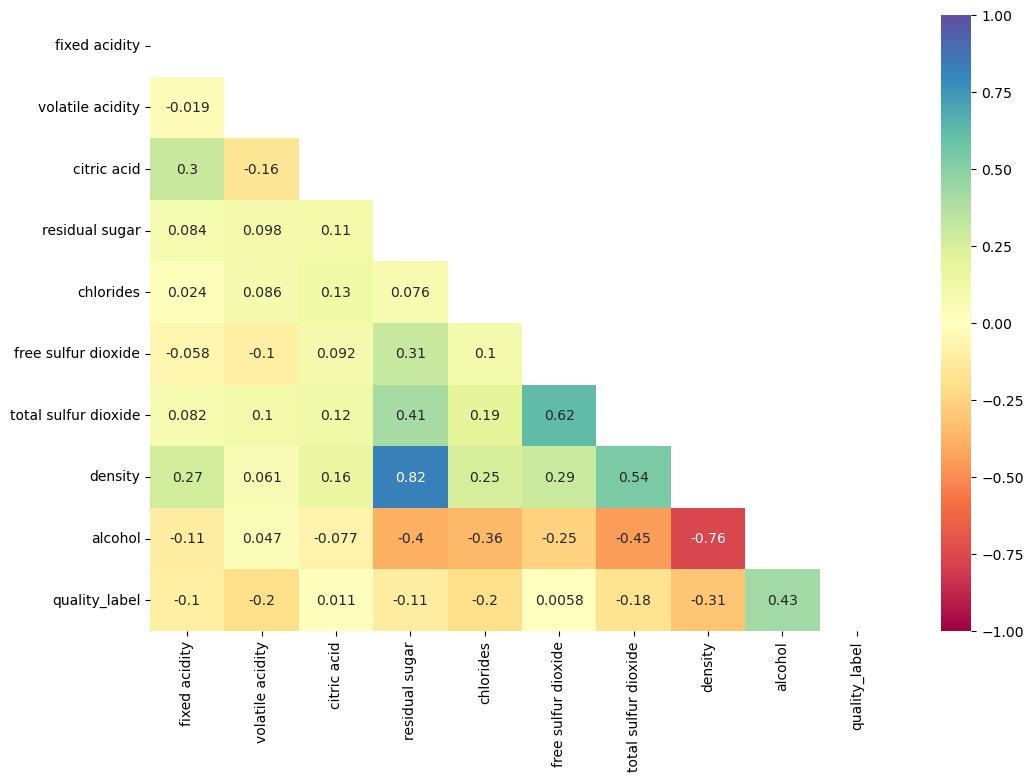

In [12]:
plt.figure(figsize=(12,8))

data = white_wine.corr()

mask = np.triu(np.ones_like(data.corr()))

sns.heatmap(data, annot=True, cmap='Spectral', vmax=1, vmin=-1, mask = mask)

plt.show()

In [13]:
X = white_wine.drop(["quality_label"], axis = 1)
y = white_wine["quality_label"]

In [14]:
# K Fold cross validation :
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
    y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 3168, Test set:793
Fold:2, Train set: 3169, Test set:792
Fold:3, Train set: 3169, Test set:792
Fold:4, Train set: 3169, Test set:792
Fold:5, Train set: 3169, Test set:792


In [15]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,8.8
1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.99510,10.1
2,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.99560,9.9
3,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.99380,11.0
4,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.99080,12.0
...,...,...,...,...,...,...,...,...,...
3164,6.2,0.21,0.29,1.60,0.039,24.0,92.0,0.99114,11.2
3165,6.6,0.32,0.36,8.00,0.047,57.0,168.0,0.99490,9.6
3166,6.5,0.24,0.19,1.20,0.041,30.0,111.0,0.99254,9.4
3167,5.5,0.29,0.30,1.10,0.022,20.0,110.0,0.98869,12.8


In [16]:
y_train.count()

3169

In [17]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol
0,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,9.500000
1,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,9.600000
2,6.6,0.170,0.38,1.50,0.032,28.0,112.0,0.99140,11.400000
3,6.4,0.310,0.38,2.90,0.038,19.0,102.0,0.99120,11.000000
4,6.6,0.270,0.41,1.30,0.052,16.0,142.0,0.99510,10.000000
...,...,...,...,...,...,...,...,...,...
787,6.2,0.530,0.02,0.90,0.035,6.0,81.0,0.99234,9.500000
788,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,9.533333
789,5.0,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,9.400000
790,5.5,0.320,0.13,1.30,0.037,45.0,156.0,0.99184,10.700000


In [18]:
#Logisticregression

#Logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
model1 = linear_model.LogisticRegression(max_iter=5000)
score = cross_val_score(model1, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy_log = np.mean(score)
print("Mean Accuracy:", mean_accuracy_log)

Scores for each fold: [0.69356873 0.71717172 0.73358586 0.7260101  0.69949495]
Mean Accuracy: 0.7139662705236476


In [19]:
#Decisiontree

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
score = cross_val_score(model2, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy_dt = np.mean(score)
print("Mean Accuracy:", mean_accuracy_dt)

Scores for each fold: [0.61916772 0.65025253 0.63257576 0.64646465 0.64141414]
Mean Accuracy: 0.6379749576470888


In [20]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
score = cross_val_score(model3, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy_rf = np.mean(score)
print("Mean Accuracy:", mean_accuracy_rf)

Scores for each fold: [0.72761665 0.73611111 0.72979798 0.76388889 0.7209596 ]
Mean Accuracy: 0.7356748442814016


In [21]:
#Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
score = cross_val_score(model4, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy_kn = np.mean(score)
print("Mean Accuracy:", mean_accuracy_kn)

Scores for each fold: [0.60655738 0.64520202 0.63005051 0.6489899  0.63510101]
Mean Accuracy: 0.6331801622785229


In [22]:
#Predicting the values for test
forest = RandomForestClassifier()
forest.fit(X_train, y_train.ravel())
y_pred = forest.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,

In [23]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to search for the best hyperparameters

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       286
           1       0.75      0.83      0.79       483
           2       0.00      0.00      0.00        23

    accuracy                           0.73       792
   macro avg       0.48      0.48      0.48       792
weighted avg       0.70      0.73      0.71       792



/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Hyperparameter tuning for RandomForestClassifier :

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


# Define the Random Forest Classifier model
rf_model = RandomForestClassifier()

# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       286
           1       0.74      0.83      0.78       483
           2       0.00      0.00      0.00        23

    accuracy                           0.72       792
   macro avg       0.47      0.47      0.47       792
weighted avg       0.69      0.72      0.70       792



/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[169, 117,   0],
       [ 83, 400,   0],
       [  0,  23,   0]])

In [26]:
# Feature Importance

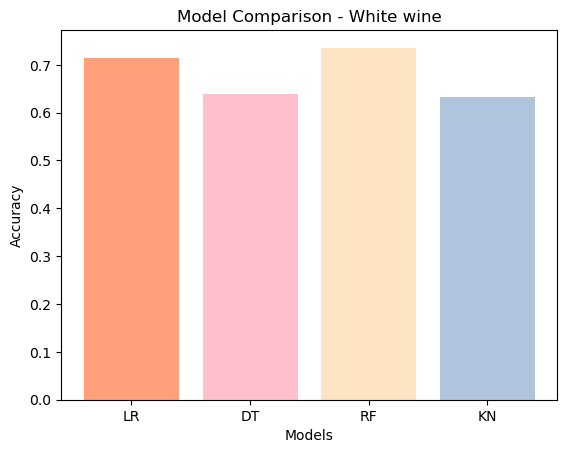

In [27]:
# Example model comparison plot

models = ['LR', 'DT', 'RF','KN']
accuracies = [mean_accuracy_log, mean_accuracy_dt, mean_accuracy_rf,mean_accuracy_kn]
plt.bar(models, accuracies, color=['lightsalmon', 'pink', 'bisque','lightsteelblue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - White wine')
plt.show()

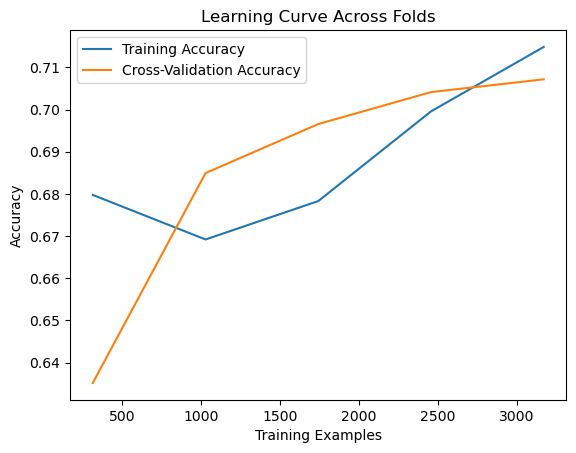

In [34]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model1, X, y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Across Folds')
plt.legend(loc='best')
plt.show()

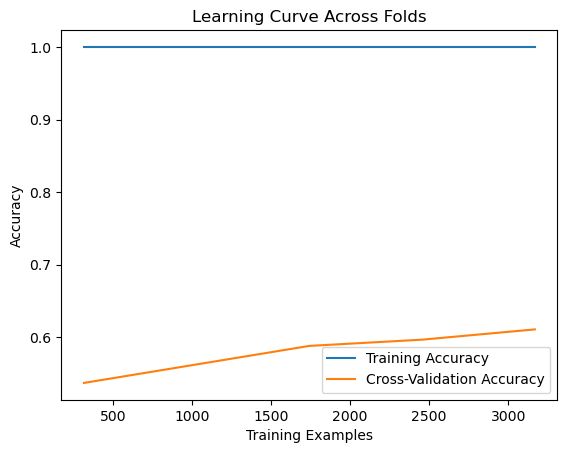

In [29]:
train_sizes, train_scores, test_scores = learning_curve(model2, X, y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Across Folds')
plt.legend(loc='best')
plt.show()

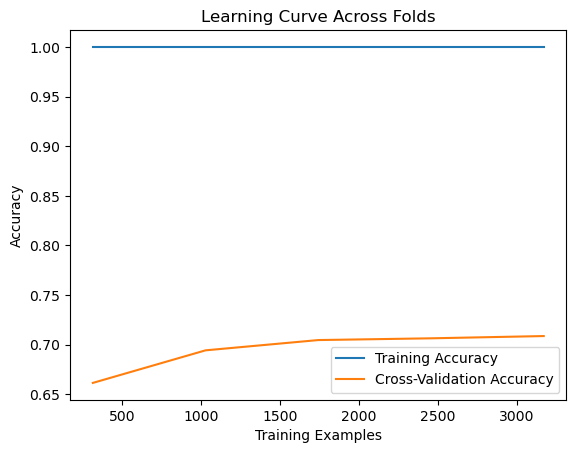

In [30]:
train_sizes, train_scores, test_scores = learning_curve(model3, X, y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Across Folds')
plt.legend(loc='best')
plt.show()

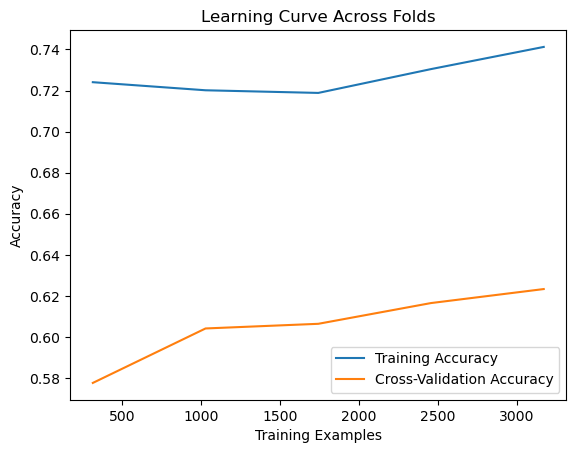

In [31]:
train_sizes, train_scores, test_scores = learning_curve(model4, X, y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Across Folds')
plt.legend(loc='best')
plt.show()

In [32]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

def generate_confusion_matrix(model, X, y, cv=5):
    """
    Generate confusion matrix using K-fold cross-validation.

    Parameters:
    - model: Machine learning model (e.g., RandomForestClassifier, DecisionTreeClassifier, LogisticRegression)
    - X: Feature matrix
    - y: Target variable
    - cv: Number of folds for cross-validation (default: 5)

    Returns:
    - Confusion matrix
    """
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    all_actual = []
    all_predicted = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        model.fit(X_train, y_train)
# Make predictions
        y_pred = model.predict(X_test)

        # Collect actual and predicted values
        all_actual.extend(y_test)
        all_predicted.extend(y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(all_actual, all_predicted)
    return conf_matrix

# Example usage with RandomForestClassifier
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_conf_matrix = generate_confusion_matrix(rf_model, X, y)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_conf_matrix = generate_confusion_matrix(dt_model, X, y)
print("\nDecision Tree Confusion Matrix:")
print(dt_conf_matrix)

# Logistic Regression
lr_model = LogisticRegression(max_iter=5000)
lr_conf_matrix = generate_confusion_matrix(lr_model, X, y)
print("\nLogistic Regression Confusion Matrix:")
print(lr_conf_matrix)

#Using KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_conf_matrix = generate_confusion_matrix(kn_model, X, y)
print("\nKNeighbors Confusion Matrix:")
print(kn_conf_matrix)

Random Forest Confusion Matrix:
[[ 821  527    0]
 [ 381 2093    3]
 [   4  130    2]]

Decision Tree Confusion Matrix:
[[ 765  565   18]
 [ 615 1745  117]
 [   9  107   20]]

Logistic Regression Confusion Matrix:
[[ 695  652    1]
 [ 344 2133    0]
 [   6  130    0]]

KNeighbors Confusion Matrix:
[[ 608  740    0]
 [ 578 1899    0]
 [  18  117    1]]
